In [1]:
import meep as mp
import numpy as np
import math

num_drops = 100
cell_size = mp.Vector3(2,2,2)
#https://www.ijert.org/research/underwater-antenna-design-and-analysis-at-ism-band-frequency-IJERTV6IS120114.pdf
isotropic_water = mp.Medium(mu=0.999991,epsilon=81,D_conductivity=4)
shifts = np.random.rand(3,num_drops)
drop_sphere = mp.Sphere(radius=0.02, material=isotropic_water)
geometry = list()
#https://slidetodoc.com/radar-meteorology-theoretical-work-mie-scattering-theory-in/
for i in range(num_drops):
    geometry.append(drop_sphere+mp.Vector3(shifts[0,i],shifts[1,i],shifts[2,i]))

sim = mp.Simulation(resolution=100,
                    cell_size=cell_size,
                    geometry=geometry)

sim.init_sim()

eps_data = sim.get_epsilon()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000133038 s
Working in 3D dimensions.
Computational cell is 2 x 2 x 2 with resolution 100
     sphere, center = (0.143973,0.921332,0.0836027)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.256526,0.646817,0.14726)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.679833,0.59588,0.0141489)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.858449,0.0335215,0.781865)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.22908,0.795354,0.931297)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.265353,0.959074,0.494652)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.881912,0.216482,0.492

/tmp/ipykernel_5934/3390517854.py:9: UserWarning: No contour levels were found within the data range.
  s = ax.contour3D(X,Y,Z[i,:,:],cmap='YlGnBu')


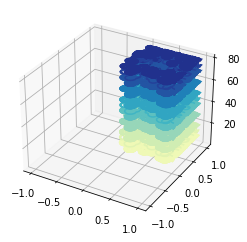

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.linspace(-1,1,200)
y = np.linspace(-1,1,200)
X, Y = np.meshgrid(x, y)
Z = eps_data
ax = plt.axes(projection='3d')
for i in range(200):
    s = ax.contour3D(X,Y,Z[i,:,:],cmap='YlGnBu')

In [3]:
Z.shape

(200, 200, 200)